# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 


## Homework 7:  ANNs and Model interpretability 


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader and Chris Tanner<br/>


<hr style="height:2pt">



In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- **This is an individual homework. No group collaboration.**
- To submit your assignment, follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and are aiming to teach. And if a problem specifies a particular library, you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [2]:
### cs109default ### 
import random
random.seed(112358)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [3]:
### cs109default ### 
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


<div class="exercise"> <b> Question 1: Construct a feed forward neural network [25 pts]</b> </div>

In this part of the homework, you are to construct three feed-forward neural networks. Each neural network will consist of an input layer, a hidden layer, and an output layer. The three different networks only differ in their number of nodes used for their hidden layer, which we specify for each specific question below. All networks' hidden layers use the sigmoid as the activation function, along with a linear output node. 

**You should code the equations from scratch.**

You are given three datasets containing $(x,y)$ points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

 

**1.1** Read the files into variables name `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values. 

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.  

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained? 

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

## Answers

**1.1** Read the files into variables name `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [4]:
### cs109Test(test_sigmoid) ### 
def sigmoid(x: float) -> float :
    """The sigmoid function 
    """
    return 1.0 / (1.0 + np.exp(-x))



</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [5]:
### cs109Test(test_1.1a) ### 
## read data 

step_df = pd.read_csv("data/step_df.csv")
one_hump_df = pd.read_csv("data/one_hump_df.csv")
two_hump_df = pd.read_csv("data/two_hump_df.csv")


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [6]:
### cs109Test (test_forwardpass) ###
# Forward pass

def forward_step(X_in: np.ndarray, WL_0: np.ndarray, 
                 WL_1: np.ndarray, y_out: np.ndarray) -> (float, float) :
    
    """
    This implements forward step:
        z = X_in . WL_0 #Input layer . Weights
        h = sigmoid(z)  #hidden 
        y = h . WL_1    #Output layer 
        (Add intercepts as appropriate)
    
    Args (3 different scenarios 1.1, 1.2 and 1.3): 
        X_in: Input array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array Shape (100,1)
              a
        WL_0: Input array [Weights for Layer 0]
              1.1 - Array shape (2,1)
              1.2 - Array shape (2,2)
              1.3 - Array shape (2,4)
              
        WL_1: Input Array [Weights for Layer 1]
              1.1 - Array shape (2,1) 
              1.2 - Array shape (3,1) 
              1.3 - Array shape (5,1)

        y_out: Input Array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array shape (100,1)
              
    Returns:
              1.1 - Output = (100, 1), hidden = (100, 2)
              1.2 - Output = (100, 1), hidden = (100, 3)
              1.3 - Output = (100, 1), hidden = (100, 5)
              (hidden will be utilized for 1.4)    
    """
 
    # your code here 
    
    z = np.dot(X_in, WL_0)  #Input layer . Weights
    hidden = sigmoid(z)  #hidden 
    output = np.dot(hidden, WL_1)    #Output layer 
    #output = sigmoid(output)

    # end of your code here
    
    
    
    return output, hidden


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [7]:
list_weight = [0],[5]
w = np.array(list_weight)

step_df_array = np.array(step_df.x).reshape(100,1)

print("weight shape: ", w.shape)
print("step_df shape: ", step_df_array.shape)

weight shape:  (2, 1)
step_df shape:  (100, 1)


In [8]:
### cs109Test(test1.1b) ###
# ONE STEP - one node in hidden layer 
# your code here
step_df=step_df.sort_values("x")
output, hidden = forward_step(np.array(step_df.x).reshape(100,1),
                              w.T, 
                              w, step_df.y)

In [9]:
print("output shape: ", output.shape)
print("hidden shape: ", hidden.shape)

output shape:  (100, 1)
hidden shape:  (100, 2)


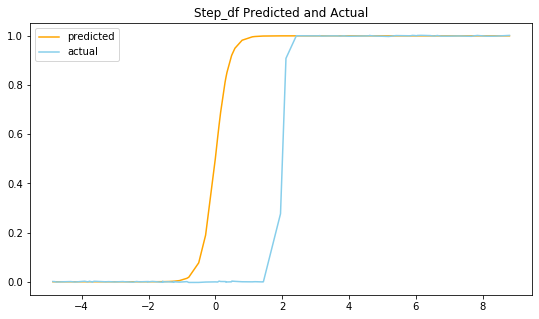

In [10]:
# plot the prediction vs true
# your code here
fig, ax = plt.subplots(1,1, figsize=(9,5))


plt.plot(step_df.x,hidden[:,1], color='orange',label="predicted")
plt.plot(step_df.x,step_df.y, color='skyblue',label="actual")
plt.legend()
plt.title("Step_df Predicted and Actual")
plt.show()

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [11]:
### 1.1 Check that you have the requested variables
for var in ['sigmoid', 'forward_step', 'step_df' , 'one_hump_df' , 'two_hump_df']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [12]:
### cs109Test(test1.2) ###
# ONE HUMP  - two nodes in hidden layer

list_weight0 = [0,1],[0,3]
w0 = np.array(list_weight0)
print("w0:",w0.shape)

list_weight1 = [0],[0],[3]
w1 = np.array(list_weight1)
print("w1:",w1.shape)

one_hump_df_array = np.array(one_hump_df.x).reshape(100,1)
print("one_hump_df_array:",one_hump_df_array.shape)

# not working correctly
#output, hidden = forward_step(one_hump_df_array,
#                              w0, 
#                              w1.T, one_hump_df.y)

w0: (2, 2)
w1: (3, 1)
one_hump_df_array: (100, 1)


**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [13]:
### cs109Test(test1.3) ###
# TWO HUMPS  - four nodes in hidden layer 
# your code here


**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained?

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [14]:
### cs109Test (testLostFunctions) ###

# Loss function 
def L(y_pred, y):   
    """
    This function returns the appropriate loss given the predictions and actual values
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
    Output:
        loss:   A scalar for the loss"""
    # your code here 


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [15]:
### cs109Test (test_der_L_WL1) ###

    
# derivative with respect to W1
def der_L_WL1(z, y_pred, y):
    """
    This function calculates the derivatives with respect to output weights
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
        z:      A vector with the values of the output layer 
    Output:
        ders:   A vector of partial derivatives 
    """
    # your code here 
    # end of your code here
    return ders # returns vector of partial derivatives

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [16]:
### cs109Test (test_GradientDescent) ###

# gradient descent 
def gradient_descent(steps, lr, WL0, WL1, X, y):
    """
    This function performs Gradient Descent
    Inputs: 
        steps: Number of steps
        lr: Learning Rate
        WL0: Layer 0 weights
        WL1: Layer 1 weights - Initital value
        X: X
        y: y
     Outputs:
        z1:  A vector with the final values of y (after steps steps)
        WL1_n: The final values of WL1 (after steps steps)
        errors: list of errors
    """
    
    
    # your code here 
    # end of your code here
    return z1, WL1_n, errors

#### a) step function NN (a hidden layer with a single node)

In [17]:
# SINGLE STEP
# your code here 


#### b) one hump function NN (a hidden layer with two nodes)

In [18]:
# ONE HUMP
# your code here 


#### c) two hump function NN (a hidden layer with 4 nodes)

In [19]:
# TWO HUMPS
# your code here 


<hr style='height:2pt'>
<div class='theme'> Neural Networks part B</div> 

Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here, we'll focus on the key idea of ANNs: they are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size). We'll also partially explore what patterns the neural network learns and how well neural networks generalize.

In this question we'll see if neural networks can learn a limited version of the [Fourier Transform.](https://en.wikipedia.org/wiki/Fourier_transform) (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In symbols: $ \cal{F(s)} = \int_{-\infty}^\infty f(x)e^{- i xs}dx$. In words, the value of the transformed function at some point, $s$, is the value of an integral which measures, in some sense, how much the original $f(x)$ looks like a wave with a period of $s$. As an example, with $f(x) = 4cos(x) + sin(2x)$,  $\cal{F}(s)$ is 0 everywhere except at -2, -1, 1, and 2, mapping to the waves of period 1 and 1/2. The values at these points are linked to the magnitude of the waves, and their phases (roughly: sin waves versus cosine waves).

The only thing about the Fourier transform that matters for this p-set is this: a function goes in, and a re-written form in terms of sine and cosine comes out.

In our specific problem, we'll train a network to map from 1000 sample values from a function (equally spaced along 0 to 2$\pi$) to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our `X_train` dataset's shape is $N x 1000$ and our `y_train` is $N x 4.$

Questions 2.1 and 2.2 will get you used to the format of the data. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 x 1,000) and (10,000 x 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 x 1,000) and (2,000 x 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 x 1,000) and (9 x 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> <b> Question 2 [25pts] </b> </div>
    
**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [20]:
### cs109default ### 
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a tf.keras model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [21]:
### cs109default ### 
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

## Answers:  

**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.


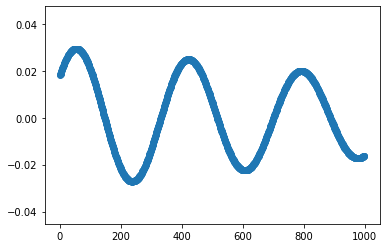

In [22]:
plt.scatter(range(len(X_train[0])),X_train[0])
plt.show()

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.


In [23]:
# your code here
def transformation_function(a,b,c,d,x):
    return a*np.sin(b*x)+c*np.cos(d*x)

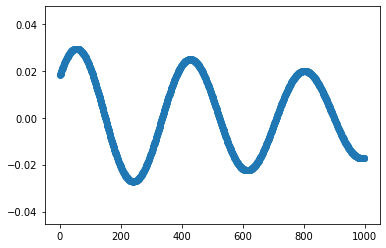

In [24]:
# your code here 
# create duplicate and use eye-test to make sure same sin curve
import math
y = 10*math.pi
true_params = []

for x in np.linspace(0,int(y),1000):
    true = transformation_function(0.024,0.533,0.018,0.558,x)
    true_params.append(true)
    
plt.scatter(range(len(true_params)),true_params)

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer.

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.


In [25]:
X_train.shape, X_test.shape

((10000, 1000), (2000, 1000))

In [26]:
y_train.shape

(10000, 4)

In [27]:
# build the fully-connected neural network
# your code here
# type together 

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1000,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4, activation='softmax')
])


In [28]:
# Compile your model 

model.compile(loss='mean_absolute_error', optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               200200    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                6432      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 206,764
Trainable params: 206,764
Non-trainable params: 0
_________________________________________________________________


**Question:**
b: Compile your model via the line model.compile(loss='mean_absolute_error', optimizer='adam') and display the .summary(). Explain why the first layer in your network has the indicated number of parameters.

**Your answer here**
The flatten layer has zero parameters because that is manipulating the data and creating a flat numpy array (i.e. not a neural net process, still data wrangling). The first dense layer has 200,200 parameters because all 200 go to all 1,000 observations. 

In [30]:
# Fit your model 
# your code here

# the core of the network training
history = model.fit(X_train, y_train, batch_size=32,
                    validation_split=0.2, 
                    epochs=50,
                    verbose=0)


**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?


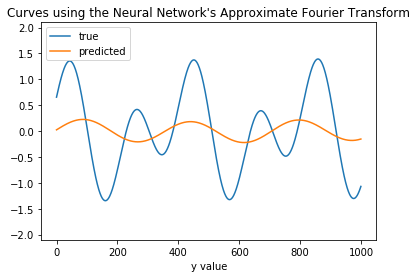

true: [0.86199664 0.98175913 0.65523998 0.4870337 ]
predicted: [0.20493965 0.5667654  0.02397604 0.20431887]


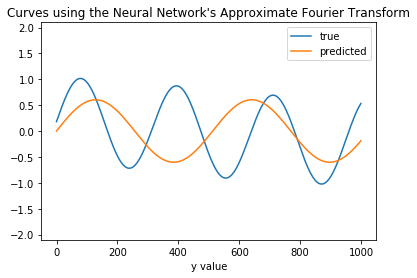

true: [0.8406355  0.63159555 0.18328701 0.11174618]
predicted: [0.60324866 0.38983682 0.00157042 0.00534406]


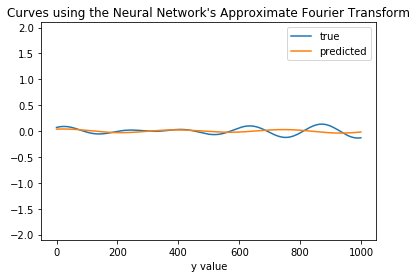

true: [0.06591224 0.75183886 0.06986143 0.91352303]
predicted: [0.01625816 0.42225373 0.03804115 0.523447  ]


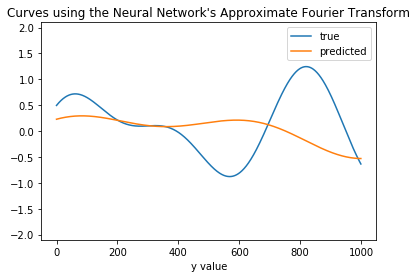

true: [0.75610725 0.30861152 0.49522059 0.48394499]
predicted: [0.3196817  0.15890236 0.22878005 0.29263595]


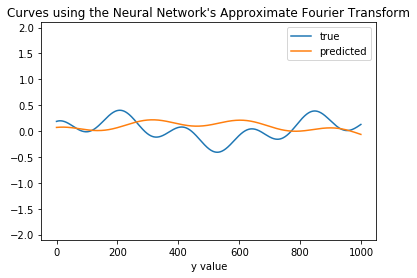

true: [0.2229353  0.27885697 0.18696198 0.94846283]
predicted: [0.16565882 0.11169846 0.07058116 0.6520615 ]


In [31]:
# your code here

plot_predictions(model, X_test, y_test, count=None)

In [32]:
# model's overall loss
# your code here

model.evaluate(X_test, y_test, verbose=0)

0.25818931579589843

**Question:**
Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

*Your answer here*

In general, the predicted models perform poorly. By looking at these 5 graphs, it looks like the model does the best when there is not a lot of movement in the actual function. The model misses the functions that have large waves. This is especially clear on the first function.


**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?


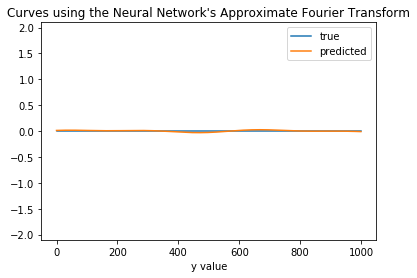

true: [0. 0. 0. 0.]
predicted: [0.01938532 0.34364748 0.01238797 0.6245792 ]


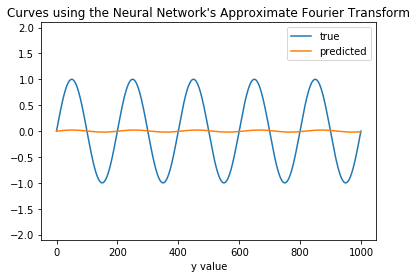

true: [1. 1. 0. 0.]
predicted: [1.9838449e-02 9.7738647e-01 5.0043701e-07 2.7745457e-03]


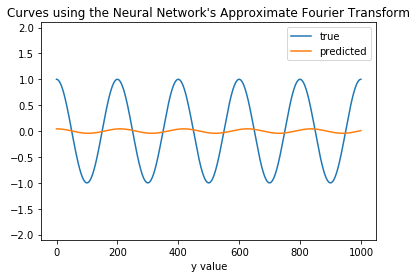

true: [0. 0. 1. 1.]
predicted: [8.5508107e-09 3.6490944e-09 4.2927667e-02 9.5707238e-01]


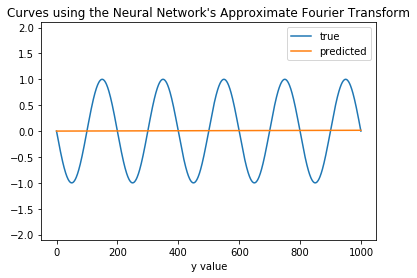

true: [-1.  1.  0.  0.]
predicted: [9.8715740e-01 4.9903785e-04 1.3590813e-11 1.2343585e-02]


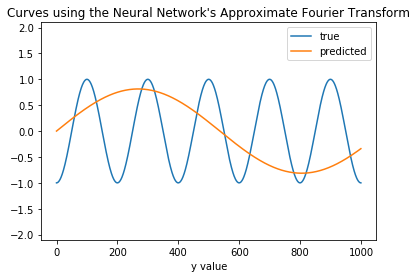

true: [ 0.  0. -1.  1.]
predicted: [8.1369889e-01 1.8630111e-01 1.4558240e-16 1.5194326e-08]


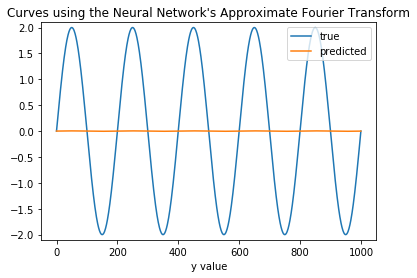

true: [2. 1. 0. 0.]
predicted: [3.6656526e-03 9.9632037e-01 1.8900170e-11 1.3965450e-05]


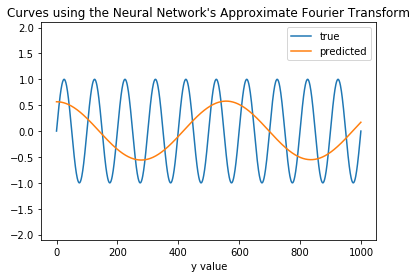

true: [1. 2. 0. 0.]
predicted: [0.01414632 0.06041018 0.566484   0.35895953]


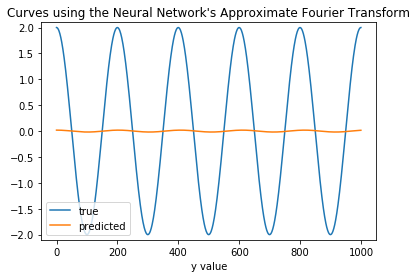

true: [0. 0. 2. 1.]
predicted: [4.4969094e-15 4.6460277e-17 1.8302139e-02 9.8169786e-01]


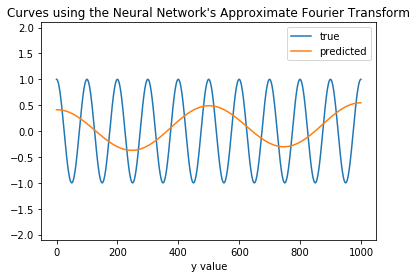

true: [0. 0. 1. 2.]
predicted: [0.15282881 0.03404843 0.41230917 0.40081352]


In [33]:
# your code here
plot_predictions(model, X_extended_test, y_extended_test, count=None)


In [34]:
results = model.evaluate(X_extended_test, y_extended_test,
                         verbose=0, batch_size=128)
print('extended test loss:', results)


extended test loss: 0.5341450572013855


**Question:**
Which examples does the model do well on, and which examples does it struggle with?


*Your answer here*

Couple observations on model performance:

1. It seems to be pretty reliant on the cosine part of the formula. When this is 0, the model predicts a fairly flat line, even if the sine has some value. 

2. The model appears to have trouble getting the correct frequency on the waves, it tends to be too conservative. 

3. The extended sample uses values at the edge of the possible values, so there is a much larger loss on these than the test/training datasets. 

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

*Your answer here*

On the training data, the loss ended up around 0.255. For the test data, the loss ended up at 0.258, which is fairly similar. Based on this, it doesn't seem to be overfit for the training data. If anything, the model seems to be underfit and is missing many of the relationships going into these functions. 

As stated in 2.5, the worst performing models seem to be those that are at the edge of possible values, like those seen in the extended test set. 


<hr style='height:2pt'>

<div class='theme'> Regularizing Neural Networks </div>

In this problem set, we have already explored how ANNs are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size), and how well the neural network can generalize. In this problem, we focus on issues of overfitting and regularization in neural networks.

As we have explained in class, ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. One approach is to use an architecture just barely wide/deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella of regularization.

In this problem, you are asked to regularize a network given to you below.
    
For this problem, we will be working with a modified version of MNIST dataset (MNIST CS109, MNIST: Modified National Institute of Standards and Technology database), which is a large database of handwritten digits and commonly used for training various image processing systems. This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. For pedagogical simplicity, we will only use the digits labeled `4` and `9`, and we want to use a total of 1600 samples for training (this includes the data you will use for validation).

We have selected the samples for you and the dataset is available at https://www.kaggle.com/c/cs109a. You have to create an account on Kaggle and join competition via https://www.kaggle.com/t/ca16b77c5feb4cbabb0d8cf63d9a7212. This is a limited participation competition. Please do not share link.  

`x_train_mnist_cs109.csv` is our training dataset, last column is the target column. Class 0 means sample is handwritten digit 4 and class 1 means sample is handwritten digit 9.  784 columns correspond to 28x28 image size. 


`x_test_mnist_cs109.csv` has  structure similar to `x_train_mnist_cs109.csv` with no labels. `x_test_mnist_cs109.csv` has 3200  samples. Kaggle leaderboard scores are accuracy scores calculated on this test set.  

`sample_submission.csv` is the format that kaggle will accept.



<div class='exercise'> <b> Question 3 [25 pts] </b> </div>
    
**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100,100,100
2. Activation function: reLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN trained on the dataset you built here will overfit to the training set. Plot the training accuracy and validation accuracy as a function of epochs and explain how you can tell it is overfitting. 


**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., drop out, L2 norm, etc.). You can also do data augmentation. 



- 3.3.1 Save your model's training accuracy as a variable called `kaggle_train_acc` and make sure it prints in the assert cell provided
- 3.3.2 Additionally, display model summary, training and validation accuracy and loss (yes, the training accuracy should be displayed again here).
- 3.3.3 Print the difference between training and validation accuracy and loss.
- 3.3.4 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.5 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.6 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Enter it in the code cell below that starts with ### cs109Test(Kaggle_name) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model. 

- **No CNNs  allowed for this competition. 

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- Do not create multiple accounts on Kaggle.


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit. 

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students




## Answers

**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.


In [35]:
# your code here

from numpy import genfromtxt

x_train_mnist_df=pd.read_csv("data/x_train_mnist_cs109.csv")
x_test_mnist=pd.read_csv("data/x_test_mnist_cs109.csv")


#separate features from outcome variable
print(x_train_mnist_df['784'].value_counts())
y_train_mnist = x_train_mnist_df['784'].values
X_train_mnist = x_train_mnist_df.drop(columns = "784").values

#reshape
X_train_mnist = np.reshape(X_train_mnist,(1600,28,28))
X_test_mnist = np.reshape(x_test_mnist.values,(3200,28,28))


1    801
0    799
Name: 784, dtype: int64


In [36]:
X_train_mnist.shape, X_test_mnist.shape

((1600, 28, 28), (3200, 28, 28))

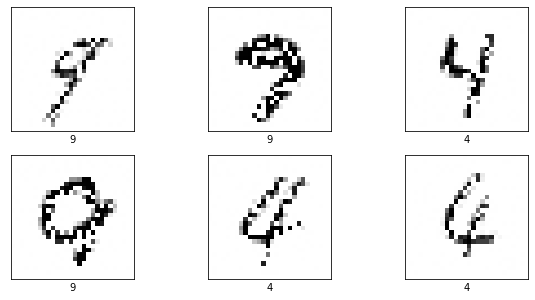

In [37]:
class_names = ['4','9']

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_mnist[i]])
plt.show()

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`:

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100,100,100
2. Activation function: reLU
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN trained on the dataset you built here will overfit to the training set. Plot the training accuracy and validation accuracy as a function of epochs and explain how you can tell it is overfitting.



In [38]:
X_train_mnist.shape, y_train_mnist.shape

((1600, 28, 28), (1600,))

In [39]:
# your code here

model_overfit = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model_overfit.compile(optimizer='adam',
                      loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_overfit.fit(X_train_mnist, y_train_mnist, 
                    validation_split=0.30, 
                    batch_size = 128,
                    epochs=300, 
                    verbose=0)

In [40]:
train_loss, train_accuracy = model_overfit.evaluate(X_train_mnist, y_train_mnist,
                         verbose=0, batch_size=128)
print('train loss:', train_loss)
print('train accuracy:', train_accuracy)




train loss: 0.3783940511115543
train accuracy: 0.96625


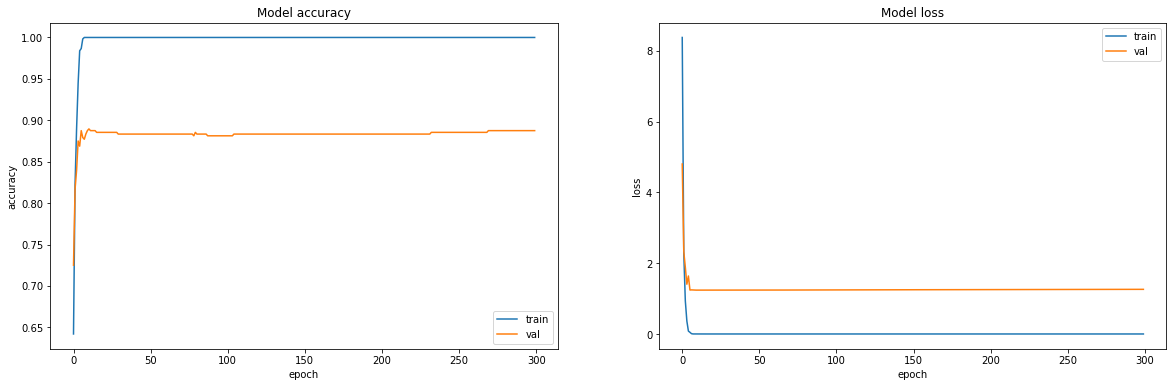

In [41]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

**Question:** 
Plot the training accuracy and validation accuracy as a function of epochs and explain how you can tell it is overfitting.

**Your answer here**

You can tell it is overfitting because the training accuracy goes to 100% after about 5-10 epochs. Similarly, the training loss goes to 0 after about 5-10 epochs. 

**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., drop out, L2 norm, etc.). You can also do data augmentation.


- 3.3.1 Save your model's training accuracy as a variable called `kaggle_train_acc` and make sure it prints in the assert cell provided
- 3.3.2 Additionally, display model summary, training and validation accuracy and loss (yes, the training accuracy should be displayed again here).
- 3.3.3 Print the difference between training and validation accuracy and loss.
- 3.3.4 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.5 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.6 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Enter it in the code cell below that starts with ### cs109Test(Kaggle_name) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model.

- **No CNNs  allowed for this competition.

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- Do not create multiple accounts on Kaggle.


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit.

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students



In [42]:
# your code here

# normalize data
X_train_mnist_norm, X_test_mnist_norm = X_train_mnist / 255.0, X_test_mnist / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

rmsprop=tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=rmsprop,
                      loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_mnist_norm, y_train_mnist, 
                    validation_split=0.10, 
                    batch_size = 128,
                    epochs=40, 
                    verbose=0)

In [43]:
train_loss, kaggle_train_acc = model.evaluate(X_train_mnist_norm, 
                                              y_train_mnist,
                         verbose=0, batch_size=128)

print("validation loss", history.history['val_loss'][-1])
print('train loss:', train_loss)
print("validation accuracy", history.history['val_accuracy'][-1])
print('kaggle_train_acc:', kaggle_train_acc)
print('Difference: ', kaggle_train_acc-train_loss)


validation loss 0.2613115668296814
train loss: 0.10478559166193008
validation accuracy 0.91875
kaggle_train_acc: 0.9675
Difference:  0.8627143797278405


In [44]:
### cs109Test(Kaggle_Train_Acc) ###
### Print your Kaggle model's train accuracy
assert 'kaggle_train_acc' in globals(), f"Variable 'kaggle_train_acc' does not exist!"
print('Kaggle Train Accuracy: {}'.format(kaggle_train_acc))

Kaggle Train Accuracy: 0.9674999713897705


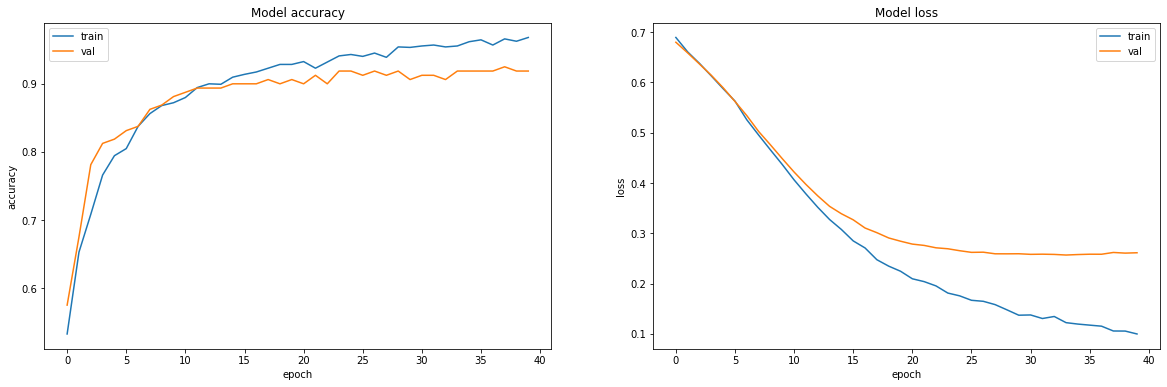

In [45]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

plt.show()

In [46]:
# your code here

predictions = model.predict_classes(X_test_mnist_norm)

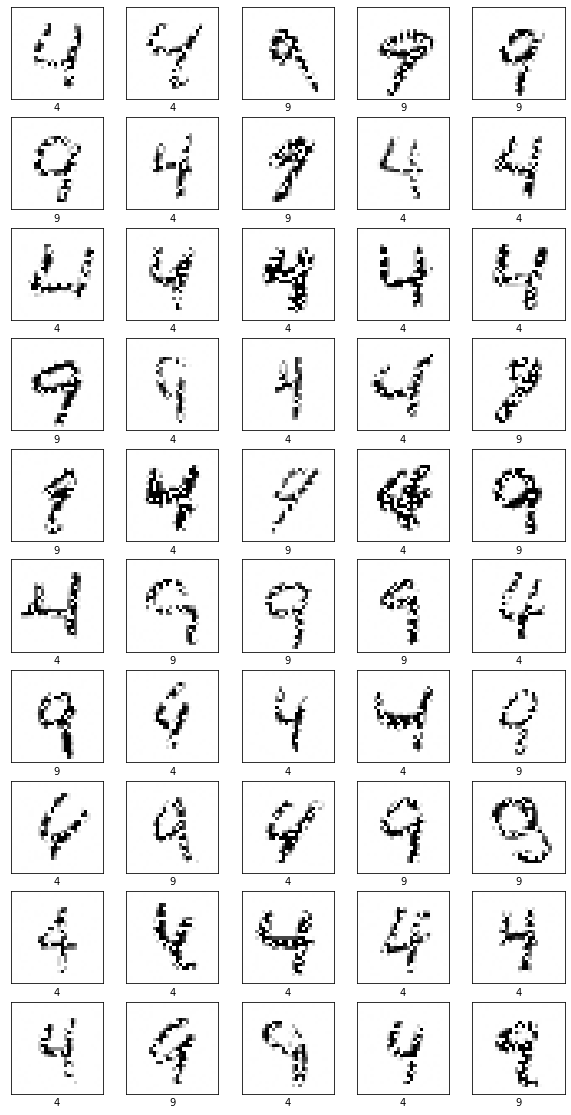

In [47]:
class_names = ['4','9']

plt.figure(figsize=(10,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_mnist_norm[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predictions.item(i)])
plt.show()

In [48]:
len(predictions[:,0])

3200

In [49]:
submission_df = pd.DataFrame(data=predictions[:,0],
                            index = range(len(predictions[:,0])),
                            columns = ['category'])

submission_df.index.name = "id"
submission_df.to_csv("submission_two.csv")

In [50]:
np.savetxt('submissions.csv', predictions, delimiter=',')

In [51]:
### cs109default ### 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### cs109test (Kaggle_name) ###

**Enter your Kaggle Leaderboard name as a string in the cell below**

**(No credit without the name!)**

In [52]:
### cs109Test(Kaggle_name) ###
# Enter your Kaggle Leaderboard name exactly as it appears
# (No name == no credit!)

KAGGLE_NAME = 'EricEnglin'

In [53]:
### Check that you entered your Kaggle name!
assert 'KAGGLE_NAME' in globals(), f"Variable 'KAGGLE_NAME' does not exist!"
assert KAGGLE_NAME != '', f"You forgot to enter your KAGGLE_NAME"
print(f'Kaggle Leaderboard Name: {KAGGLE_NAME}')

Kaggle Leaderboard Name: EricEnglin


---

<div class='exercise'><b> Question 4: Model interpretations </b> </div>

In this problem you will be building and interpreting models to predict whether or not a flight was delayed for its arrival based on features that could be measured as the flight takes off.  The included variables are:

**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).

**DISTANCE**: the distance between arrival and departure airports, in miles.

**SCHEDULED_TIME**: the amount of time the flight was scheduled to take.

**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.

**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).

**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).

**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.

**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.

**ORIGIN_AIRPORT**: the airport the flight took off from.

**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.

For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

This problem steps you through fitting several models (starting simple, tuning a  and building up to complex), evaluate their accuracies, and then interpret the relationships of the predictors in the models via feature importance measures and through plotting their predications.

*Note: the observations were stratified sampled so that roughly half of the observations were delayed and half of the observations were not delayed.


**4.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). Turn the following predictors into dummies: `['ORIGIN_AIRPORT','DESTINATION_AIRPORT']`, and then split into train and test (80-20 split) using `train_test_split` with a random state of `109`.  Print out the dimensions of the resulting train and test `flights_train` and `flights_test` data frames.

**4.2** Fit two tree based models: one with `max_depth = 20` (call it `tree20`) and one with a `best_depth` that is chosen via 5-fold cross-validation (call it `tree_best`) using all predictors.  Evaluate these two models via AUC on both train and test.  Print out `tree20_train_auc`, `tree20_test_auc`, `tree_best_train_auc`, and `tree_best_test_auc` (make sure they are well-labeled in the print out; see primer below).

**4.3** Interpret your tree based models.  Provide a plot with the **relative** variable importance of the 10 most important predictors, `top_predictors` in each of the two models.  Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter. 

**4.4** Fit an artifical neural network model (call it `NN_model`) using all predictors.  Use a dense 2-layer feed-forward network (1 input, 1 hidden) with 15 nodes in each layer.  Evaluate the model on both train and test, and print out the resulting `NN_model_train_auc`, `NN_model_train_auc`.

**4.5** Fit a classification tree with `max_depth=20` on the predictions from your `NN_model`.  Call it `dec_tree_NN`.  Draw the first 3 layers of the tree and interpret what predictors seem most important in `dec_tree_NN` from the top of this tree.

**4.6** Use your `dec_tree_NN` to measure **relative** variable importance in your `NN_model` and provide a plot for the 10 most important predictors.  How do these compare to those from 4.3 and the drawn tree in 4.5?  Discuss in 2-4 sentences.

**4.7** Interpret the results of your `NN_model` via plotting predicted probabilities of delay vs. `SCHED_DEP_HOUR` when all the other variables are set to their means/modes.  Interpret what you see in 2-4 sentences.

## Answers

**4.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). Turn the following predictors into dummies: `['ORIGIN_AIRPORT','DESTINATION_AIRPORT']`, and then split into train and test (80-20 split) using `train_test_split` with a random state of `109`.  Print out the dimensions of the resulting train and test `flights_train` and `flights_test` data frames.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [54]:
### cs109Test (test_4.1) ### 
# your code here 

flights_df = pd.read_csv("data/flights.csv")
print(flights_df.shape)

flights_df['DELAY_OR_NOT']= np.where(
    flights_df['ARRIVAL_DELAY']>15,1,0)

flights_df = pd.get_dummies(flights_df, 
               columns = ['ORIGIN_AIRPORT',
                          'DESTINATION_AIRPORT'])

flights_train, flights_test = train_test_split(
    flights_df, test_size=0.2, random_state=109)

(10000, 10)


In [55]:
flights_train.shape, flights_test.shape

((8000, 812), (2000, 812))

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [56]:
### 4.1 Check that you have the requested variables
for var in ['flights_train', 'flights_test']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**4.2** Fit two tree based models: one with `max_depth = 20` (call it `tree20`) and one with a `best_depth` that is chosen via 5-fold cross-validation (call it `tree_best`) using all predictors.  Evaluate these two models via AUC on both train and test.  Print out `tree20_train_auc`, `tree20_test_auc`, `tree_best_train_auc`, and `tree_best_test_auc` (make sure they are well-labeled in the print out; see primer below).


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [57]:
### cs109Test (test_4.2a) ### 
# your code here

#create x, y data
flights_train_x = flights_train.drop(columns = ['DELAY_OR_NOT','ARRIVAL_DELAY'])
flights_train_y = flights_train['DELAY_OR_NOT']
flights_test_x = flights_test.drop(columns = ['DELAY_OR_NOT','ARRIVAL_DELAY'])
flights_test_y = flights_test['DELAY_OR_NOT']


# end of your code here

In [58]:
### cs109Test (test_4.2b) ### 
# Decision Tree Classifier
# your code here 


# make tree and score for tree20
tree20 = DecisionTreeClassifier(max_depth=20)
tree20.fit(flights_train_x,flights_train_y)




# find optimal depth
cvmeans = []
cvstds = []
train_scores = []
cv_scores = []
for depth in range(1,21):
    clf = DecisionTreeClassifier(max_depth=depth)
    # Perform 5-fold cross validation and store results
    train_scores.append(clf.fit(flights_train_x, 
                                flights_train_y).score(flights_train_x, 
                                                       flights_train_y))
    scores = cross_val_score(estimator=clf, X=flights_train_x, 
                             y=flights_train_y, cv=5)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())



best_depth = (cvmeans.index(max(cvmeans))+1)
print("Best Depth is: ", best_depth)
# make tree and score for tree20
tree_best = DecisionTreeClassifier(max_depth=best_depth)

tree_best.fit(flights_train_x,flights_train_y)



# end of your code here
### 4.2 Check that you have the requested variables
for var in ['tree20', 'tree_best', 'best_depth']:
    assert var in globals(), f"Variable '{var}' does not exist!"

Best Depth is:  3


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [59]:
### cs109Test (test_4.2c) ### 
# primer to print: 
# print("tree20_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 

# train set
predictions_train_tree20 = tree20.predict_proba(flights_train_x)
tree20_train_auc = roc_auc_score(flights_train_y, 
                                  predictions_train_tree20[:,1])


# test set
predictions_test_tree20 = tree20.predict_proba(flights_test_x)
tree20_test_auc = roc_auc_score(flights_test_y, 
                                  predictions_test_tree20[:,1])



# train set
predictions_train_tree_best = tree_best.predict_proba(flights_train_x)
tree_best_train_auc = roc_auc_score(flights_train_y, 
                                  predictions_train_tree_best[:,1])


# test set
predictions_test_tree_best = tree_best.predict_proba(flights_test_x)
tree_best_test_auc = roc_auc_score(flights_test_y, 
                                  predictions_test_tree_best[:,1])


print("tree20_train_auc:", tree20_train_auc)
print("tree20_test_auc:", tree20_test_auc)
print("tree_best_train_auc:", tree_best_train_auc)
print("tree_best_test_auc:", tree_best_test_auc)



tree20_train_auc: 0.9750301392319006
tree20_test_auc: 0.6606192031955763
tree_best_train_auc: 0.7828740555215872
tree_best_test_auc: 0.7784395042677339


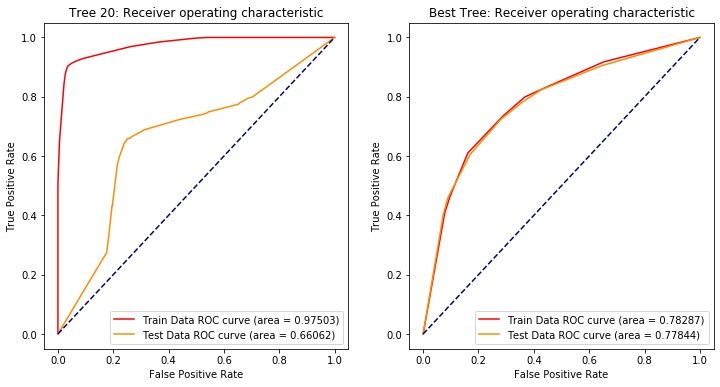

In [60]:
# your code here  

from sklearn.metrics import roc_curve


fpr_20train, tpr_20train, thresholds_20train = roc_curve(flights_train_y, 
                                         predictions_train_tree20[:,1])

fpr_20test, tpr_20test, thresholds_20test = roc_curve(flights_test_y, 
                                         predictions_test_tree20[:,1])


fpr_best_train, tpr_best_train, thresholds_best_train = roc_curve(flights_train_y, 
                                         predictions_train_tree_best[:,1])

fpr_best_test, tpr_best_test, thresholds_best_test = roc_curve(flights_test_y, 
                                         predictions_test_tree_best[:,1])





fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,6))

ax[0].plot(fpr_20train, tpr_20train, color='r', label='Train Data ROC curve (area = {})'.format(np.round(tree20_train_auc,5)))
ax[0].plot(fpr_20test, tpr_20test, color='darkorange', label='Test Data ROC curve (area = {})'.format(np.round(tree20_test_auc,5)))
ax[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Tree 20: Receiver operating characteristic')
ax[0].legend();


ax[1].plot(fpr_best_train, tpr_best_train, color='r', label='Train Data ROC curve (area = {})'.format(np.round(tree_best_train_auc,5)))
ax[1].plot(fpr_best_test, tpr_best_test, color='darkorange', label='Test Data ROC curve (area = {})'.format(np.round(tree_best_test_auc,5)))
ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Best Tree: Receiver operating characteristic')
ax[1].legend();




**4.3** Interpret your tree based models.  Provide a plot with the **relative** variable importance of the 10 most important predictors, `top_predictors` in each of the two models.  Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

Text(0.5, 1.0, 'Best Tree: Feature Importance')

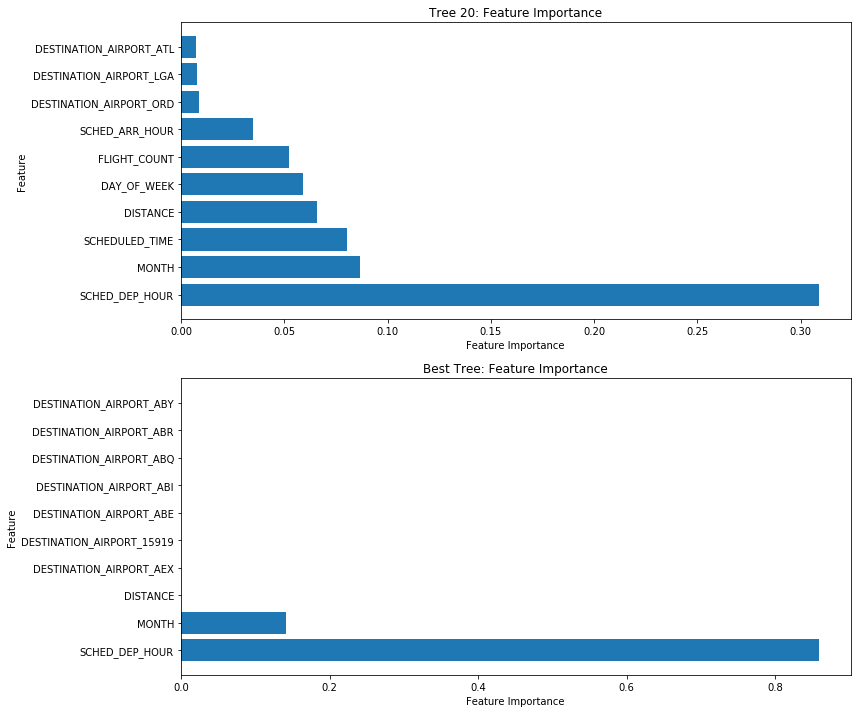

In [61]:
### cs109Test (test_4.3) ### 
#feature importance
# your code here 

tree20_fi = pd.DataFrame({
    "column":flights_train_x.columns,
    "importance":tree20.feature_importances_
})

tree_best_fi = pd.DataFrame({
    "column":flights_train_x.columns,
    "importance":tree_best.feature_importances_
})


top_tree20 = tree20_fi.sort_values("importance", ascending=False).head(10)
top_besttree = tree_best_fi.sort_values("importance", ascending=False).head(10)

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(12,12))

ax[0].barh(top_tree20.column, top_tree20.importance)
ax[0].set_xlabel('Feature Importance')
ax[0].set_ylabel('Feature')
ax[0].set_title('Tree 20: Feature Importance')


ax[1].barh(top_besttree.column, top_besttree.importance)
ax[1].set_xlabel('Feature Importance')
ax[1].set_ylabel('Feature')
ax[1].set_title('Best Tree: Feature Importance')






**Question:**
Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter.

**Your answer here**
Schedule departure hour and month are clearly the most important because they show up in both models. You can tell that the 20-depth tree is overfitting because it is making many more features important for its decision-making. Alternatively, the 3-depth tree is only relying on 2 features, which makes for a simple model (although it is fair to wonder if this can be improved upon since it is only giving a 75% accuracy rate on predictions).

**4.4** Fit an artifical neural network model (call it `NN_model`) using all predictors.  Use a dense 2-layer feed-forward network (1 input, 1 hidden) with 15 nodes in each layer.  Evaluate the model on both train and test, and print out the resulting `NN_model_train_auc`, `NN_model_train_auc`.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [62]:
flights_train_x_nn = np.array(flights_train_x.values).reshape(-1,810)
flights_test_x_nn = np.array(flights_test_x.values).reshape(-1,810)


flights_train_x_nn.shape, flights_test_x_nn.shape

((8000, 810), (2000, 810))

In [63]:
### cs109Test (test_4.4) ### 
# build the NN 
# your code here


NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(810,)),
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])



</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [64]:
### 4.4 Check that you have the requested variables
for var in ['NN_model']:
    assert var in globals(), f"Variable '{var}' does not exist!"

In [65]:
# compile it and run it
# your code here 

NN_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
              metrics=['accuracy'])

history = NN_model.fit(flights_train_x_nn, flights_train_y.values, 
                    validation_split=0.30, 
                    batch_size = 128,
                    epochs=30, 
                    verbose=0)

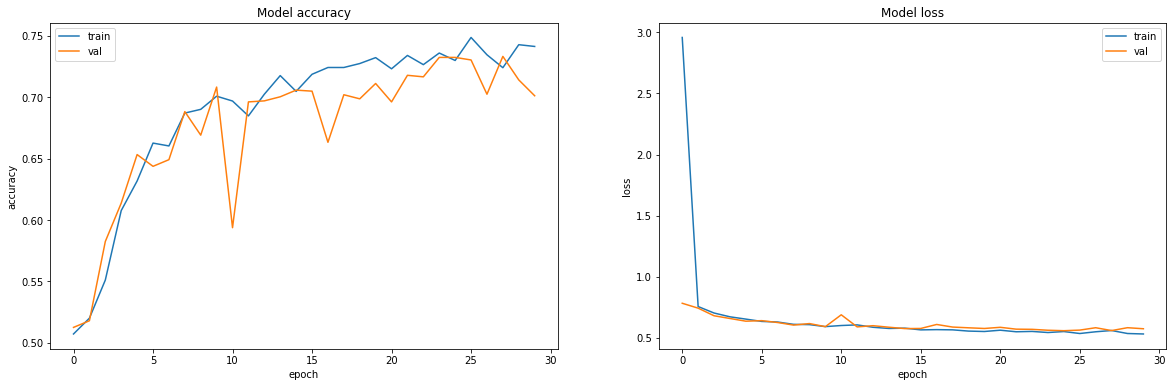

In [66]:
# plot train and val acc as  a function of epochs
# your code here

fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

plt.show()

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [67]:
### cs109Test (test_4.4b) ### 
# primer to print: 
# print("NN_model_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 

# train set
predictions_train_nn = NN_model.predict_proba(flights_train_x_nn)
NN_model_train_auc = roc_auc_score(flights_train_y, 
                                  predictions_train_nn)


# test set
predictions_test_nn = NN_model.predict_proba(flights_test_x_nn)
NN_model_test_auc = roc_auc_score(flights_test_y, 
                                  predictions_test_nn)

print("NN_model_train_auc:", NN_model_train_auc)
print("NN_model_test_auc:", NN_model_test_auc)

NN_model_train_auc: 0.8143392815672413
NN_model_test_auc: 0.7965030300107698


**4.5** Fit a classification tree with `max_depth=20` on the predictions from your `NN_model`.  Call it `dec_tree_NN`.  Draw the first 3 layers of the tree and interpret what predictors seem most important in `dec_tree_NN` from the top of this tree.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [68]:
### cs109Test (test_4.5) ### 
# your code here

dec_tree_NN = DecisionTreeClassifier(max_depth=20)
dec_tree_NN.fit(flights_train_x,np.rint(predictions_train_nn))

#tree.plot_tree(dec_tree_NN) 
# Note: tree not plotting as image and having trouble adding packages 
#.       due to yaml

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [69]:
### 4.5 Check that you have the requested variables
for var in ['dec_tree_NN']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**4.6** Use your `dec_tree_NN` to measure **relative** variable importance in your `NN_model` and provide a plot for the 10 most important predictors.  How do these compare to those from 4.3 and the drawn tree in 4.5?  Discuss in 2-4 sentences.


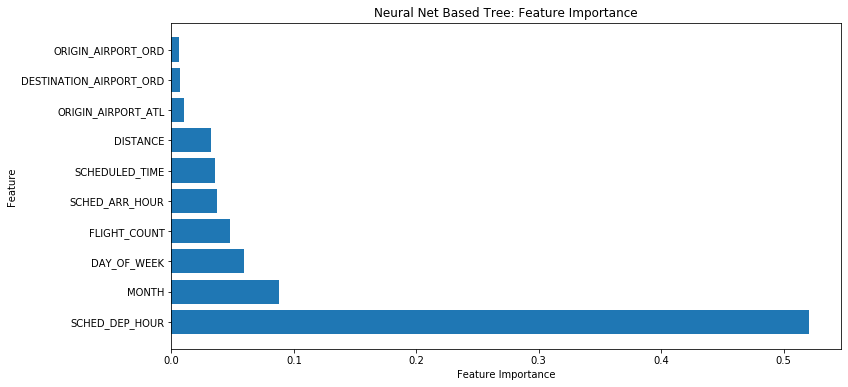

In [70]:
dec_tree_NN_fi = pd.DataFrame({
    "column":flights_train_x.columns,
    "importance":dec_tree_NN.feature_importances_
})


top_tree_nn = dec_tree_NN_fi.sort_values("importance", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,6))

ax.barh(top_tree_nn.column, top_tree_nn.importance)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Neural Net Based Tree: Feature Importance')
plt.show()



**Answer:**
The top variables are the same, but more variables are shown as important. There are a lot of similarities between this top 10 features and the ones with the maximum depth not using the NN model. This is impressive because it shows that the neural net is likely using more variables but is able to improve on the decision tree accuracy.

**4.7** Interpret the results of your `NN_model` via plotting predicted probabilities of delay vs. `SCHED_DEP_HOUR` when all the other variables are set to their means/modes.  Interpret what you see in 2-4 sentences.

In [71]:
# your code here

#create new dataset with only means for all columns
import statistics


flights_train_x_mean = flights_train_x
flights_test_x_mean = flights_test_x


for col in flights_train_x_mean.columns:
    if col == 'SCHED_DEP_HOUR':
        pass
    else:
        flights_train_x_mean[col]=statistics.mean(flights_train_x_mean[col])
        flights_test_x_mean[col]=statistics.mean(flights_test_x_mean[col])


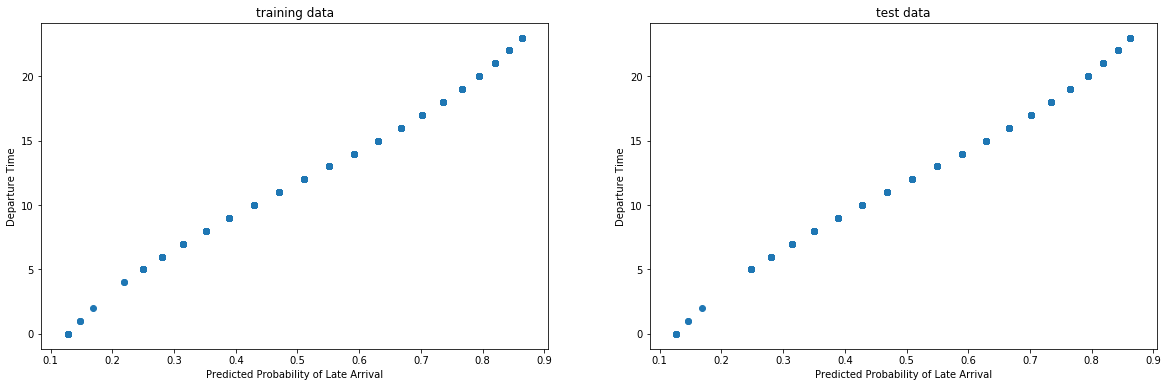

In [72]:
# reshape to numpy arrays
flights_train_x_mean_nn = np.array(flights_train_x_mean.values).reshape(-1,810)
flights_test_x_mean_nn = np.array(flights_test_x_mean.values).reshape(-1,810)

# create predictions
predictions_train_mean_nn = NN_model.predict_proba(flights_train_x_mean_nn)
predictions_test_mean_nn = NN_model.predict_proba(flights_test_x_mean_nn)


# create plots
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].scatter(predictions_train_mean_nn, flights_train_x.SCHED_DEP_HOUR, 
           label="training data",)
ax[0].set_title('training data')
ax[0].set_ylabel('Departure Time')
ax[0].set_xlabel('Predicted Probability of Late Arrival')

ax[1].scatter(predictions_test_mean_nn, flights_test_x.SCHED_DEP_HOUR,
           label = 'test data')
ax[1].set_title('test data')
ax[1].set_ylabel('Departure Time')
ax[1].set_xlabel('Predicted Probability of Late Arrival')

plt.show()



**Your answer here**
There is a steep rise in the morning when the first flights start going out, this declines around 10 am, and then peaks accelerates again around 8 pm. Without any other real information in the dataset, the model would predict that later-arriving airplanes are going to have the highest probability of being late. 